In [35]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



# Render plots inline
%matplotlib inline

# Make the graphs a bit prettier, and bigger
plt.rcParams['figure.figsize'] = (15, 5)

In [36]:
df = pd.read_csv('Database\insurance.csv')
df.head(100)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
95,28,female,37.620,1,no,southeast,3766.88380
96,54,female,30.800,3,no,southwest,12105.32000
97,55,male,38.280,0,no,southeast,10226.28420
98,56,male,19.950,0,yes,northeast,22412.64850


In [37]:
data = df.copy()

In [38]:
#df = df.replace(['yes'],'1')
#df = df.replace(['no'],'0')
#df = df.replace(['male'],'1')
#df = df.replace(['female'],'0')


df.head(100)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
95,28,female,37.620,1,no,southeast,3766.88380
96,54,female,30.800,3,no,southwest,12105.32000
97,55,male,38.280,0,no,southeast,10226.28420
98,56,male,19.950,0,yes,northeast,22412.64850


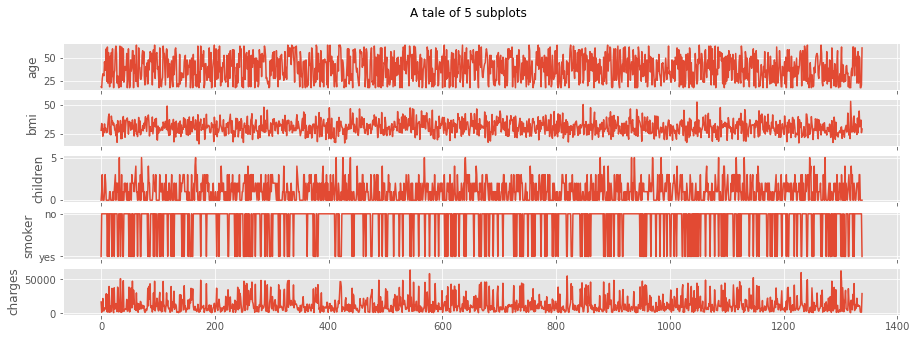

In [39]:
# Data for plotting
plt.show()
a = data['age']
b = data['bmi']
c = data['children']
s = data['smoker']
m = data['charges']

df.plot
x = np.linspace(0.0, 1338.0, num = 1338)

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1)
fig.suptitle('A tale of 5 subplots')
ax1.plot(x, a)
ax1.set_ylabel('age')
ax2.plot(x, b) #'tab:yellow')
ax2.set_ylabel('bmi')
ax3.plot(x, c) #'tab:green')
ax3.set_ylabel('children')
ax4.plot(x, s) # 'tab:red')
ax4.set_ylabel('smoker')
ax5.plot(x, m) #'tab:blue')
ax5.set_ylabel('charges')

for ax in fig.get_axes():
    ax.label_outer()


In [40]:
df.shape

(1338, 7)

In [41]:
#Datentyp jeder Spalte
df.dtypes

#Anzahl der NULL-Werte
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [42]:
#number of unique values of column Gender
df.sex.nunique()
# 2

# unique values of column Gender
df.sex.unique()
# array(['male', 'female'], dtype=object)

array(['female', 'male'], dtype=object)

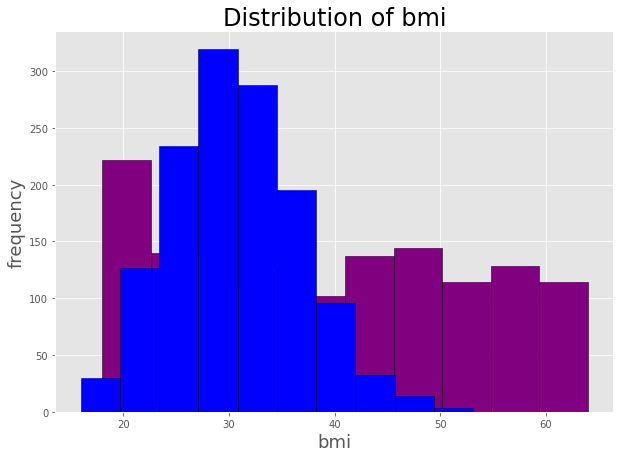

In [43]:
plt.style.use('ggplot')

# histogram of the height
df.age.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of age', size=24)
plt.xlabel('age', size=18)
plt.ylabel('frequency', size=18)

# histogram of the weight
df.bmi.plot(kind='hist', color='blue', edgecolor='black', figsize=(10,7))
plt.title('Distribution of bmi', size=24)
plt.xlabel('bmi' , size=18)
plt.ylabel('frequency', size=18);

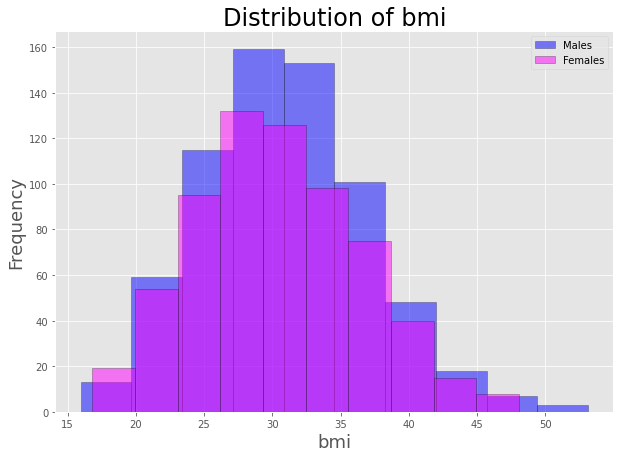

In [44]:
df[df['sex'] == 'male'].bmi.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['sex'] == 'female'].bmi.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of bmi', size=24)
plt.xlabel('bmi', size=18)
plt.ylabel('Frequency', size=18);

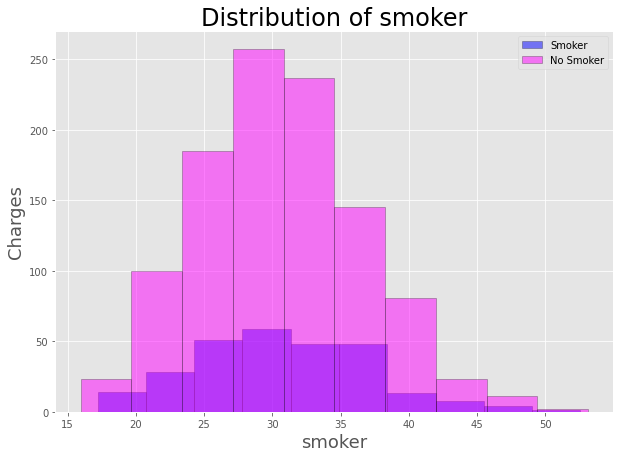

In [45]:
df[df['smoker'] == 'yes'].bmi.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['smoker'] == 'no'].bmi.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Smoker', 'No Smoker'])
plt.title('Distribution of smoker', size=24)
plt.xlabel('smoker', size=18)
plt.ylabel('Charges', size=18);

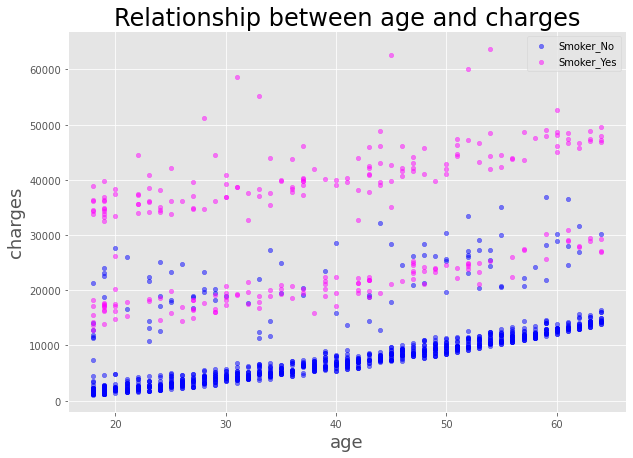

In [46]:
# Scatter plot of bmi and charges

ax1 = df[df['smoker'] == 'no'].plot(kind='scatter', x='age', y='charges', color='blue', alpha=0.5, figsize=(10, 7))
df[df['smoker'] == 'yes'].plot(kind='scatter', x='age', y='charges', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['Smoker_No', 'Smoker_Yes'])
plt.title('Relationship between age and charges', size=24)
plt.xlabel('age', size=18)
plt.ylabel('charges', size=18);

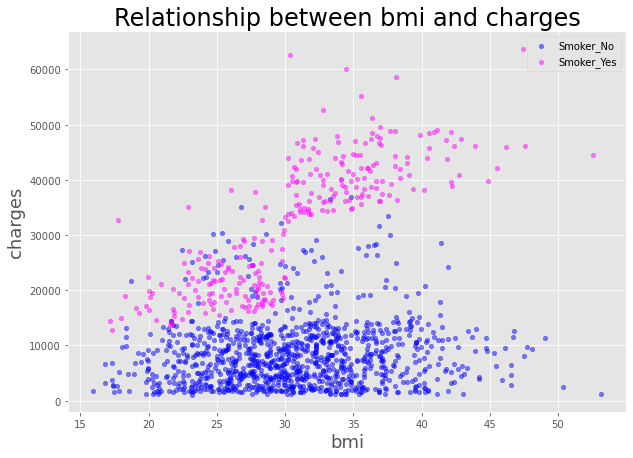

In [47]:
# Scatter plot of bmi and charges

ax1 = df[df['smoker'] == 'no'].plot(kind='scatter', x='bmi', y='charges', color='blue', alpha=0.5, figsize=(10, 7))
df[df['smoker'] == 'yes'].plot(kind='scatter', x='bmi', y='charges', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['Smoker_No', 'Smoker_Yes'])
plt.title('Relationship between bmi and charges', size=24)
plt.xlabel('bmi', size=18)
plt.ylabel('charges', size=18);

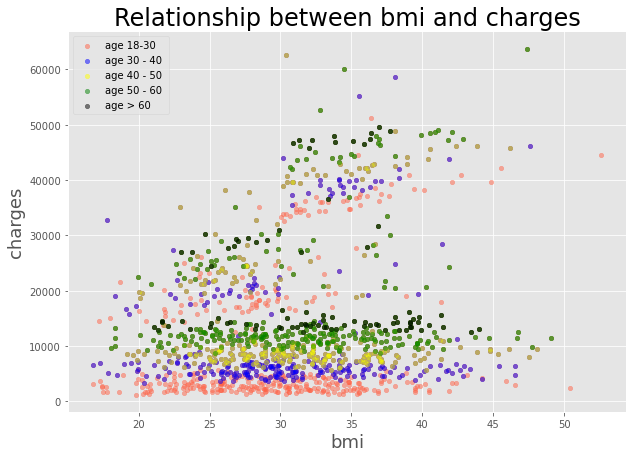

In [65]:
# Scatter plot of bmi and charges

df['age'] = df['age'].astype('str')
ax1 = df[df['age'] >= '18.00'].plot(kind='scatter', x='bmi', y='charges', color='tomato', alpha=0.5, figsize=(10, 7))
ax1 = df[df['age'] >= '30.00'].plot(kind='scatter', x='bmi', y='charges', color='blue', alpha=0.5, figsize=(10, 7), ax=ax1)
ax1 = df[df['age'] >= '40.00'].plot(kind='scatter', x='bmi', y='charges', color='yellow', alpha=0.5, figsize=(10, 7), ax=ax1)
ax1 = df[df['age'] >= '50.00'].plot(kind='scatter', x='bmi', y='charges', color='green', alpha=0.5, figsize=(10, 7), ax=ax1)
ax1 = df[df['age'] >= '60.00'].plot(kind='scatter', x='bmi', y='charges', color='black', alpha=0.5, figsize=(10, 7), ax=ax1)
#df[df['smoker'] == 'yes'].plot(kind='scatter', x='bmi', y='charges', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
#fig, (ax1) = plt.subplots(4, 2)
plt.legend(labels=['age 18-30 ', 'age 30 - 40', 'age 40 - 50 ', 'age 50 - 60', 'age > 60'])
plt.title('Relationship between bmi and charges', size=24)
plt.xlabel('bmi', size=18)
plt.ylabel('charges', size=18);

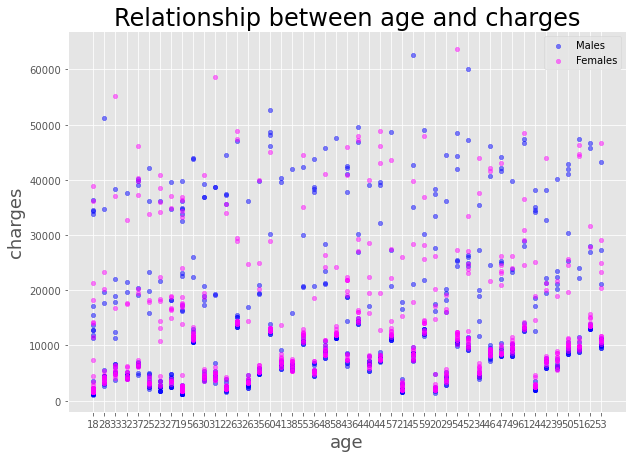

In [15]:
# Scatter plot of charges and age

ax1 = df[df['sex'] == 'male'].plot(kind='scatter', x='age', y='charges', color='blue', alpha=0.5, figsize=(10, 7))
df[df['sex'] == 'female'].plot(kind='scatter', x='age', y='charges', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between age and charges', size=24)
plt.xlabel('age', size=18)
plt.ylabel('charges', size=18);

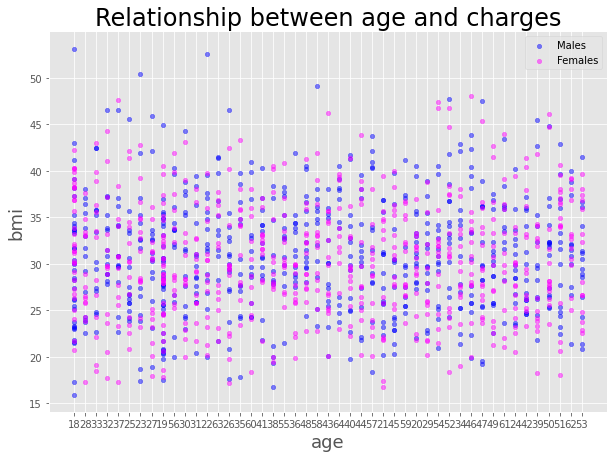

In [16]:
# Scatter plot of charges and age

ax1 = df[df['sex'] == 'male'].plot(kind='scatter', x='age', y='bmi', color='blue', alpha=0.5, figsize=(10, 7))
df[df['sex'] == 'female'].plot(kind='scatter', x='age', y='bmi', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between age and charges', size=24)
plt.xlabel('age', size=18)
plt.ylabel('bmi', size=18);

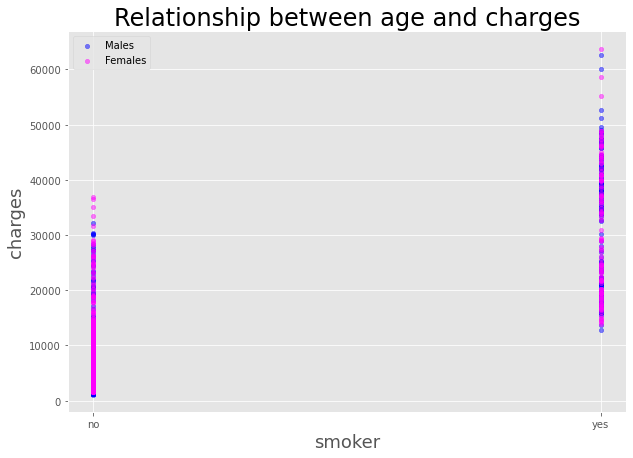

In [17]:
# Scatter plot of Height and Weight

ax1 = df[df['sex'] == 'male'].plot(kind='scatter', x='smoker', y='charges', color='blue', alpha=0.5, figsize=(10, 7))
df[df['sex'] == 'female'].plot(kind='scatter', x='smoker', y='charges', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between age and charges', size=24)
plt.xlabel('smoker', size=18)
plt.ylabel('charges', size=18);

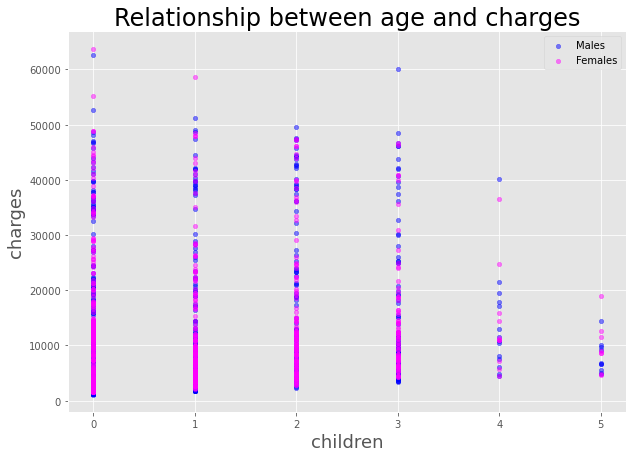

In [18]:
# Scatter plot of charges and age

ax1 = df[df['sex'] == 'male'].plot(kind='scatter', x='children', y='charges', color='blue', alpha=0.5, figsize=(10, 7))
df[df['sex'] == 'female'].plot(kind='scatter', x='children', y='charges', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between age and charges', size=24)
plt.xlabel('children', size=18)
plt.ylabel('charges', size=18);

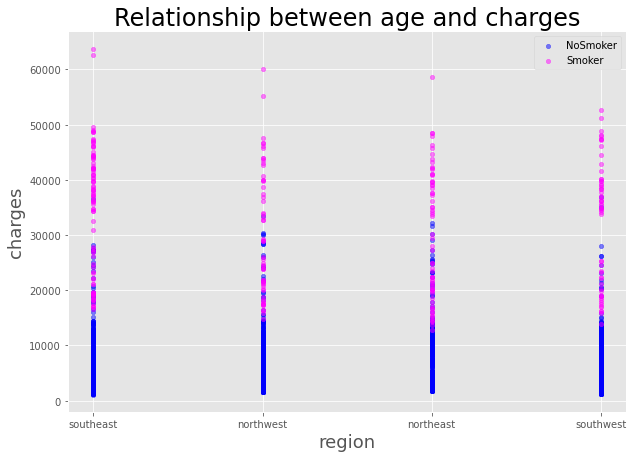

In [19]:
# Scatter plot of charges and age

ax1 = df[df['smoker'] == 'no'].plot(kind='scatter', x='region', y='charges', color='blue', alpha=0.5, figsize=(10, 7))
df[df['smoker'] == 'yes'].plot(kind='scatter', x='region', y='charges', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['NoSmoker', 'Smoker'])
plt.title('Relationship between age and charges', size=24)
plt.xlabel('region', size=18)
plt.ylabel('charges', size=18);

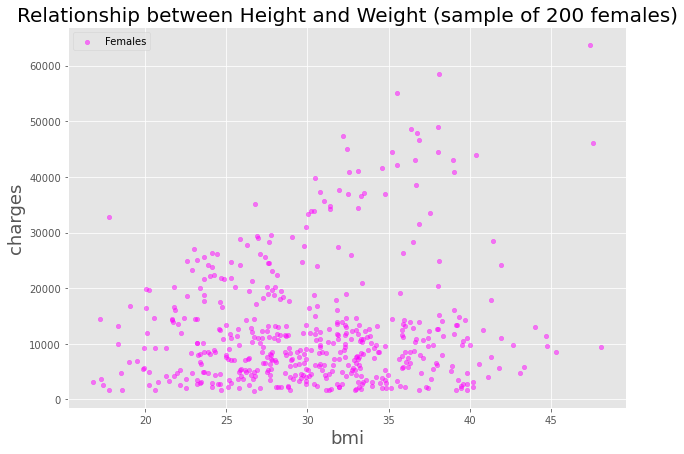

In [29]:

# Scatter plot of 200 females

sample_females = df[df['sex'] == 'female'].sample(500)
sample_females.plot(kind='scatter', x='bmi', y='charges', color='magenta', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Females'])
plt.title('Relationship between Height and Weight (sample of 200 females)', size=20)
plt.xlabel('bmi', size=18)
plt.ylabel('charges', size=18);

In [31]:
# best fit polynomials

df_males = df[df['sex'] == 'male']
df_females = df[df['sex'] == 'female']

# polynomial - males
male_fit = np.polyfit(df_males.bmi, df_males.charges, 1)
# array([   5.96177381, -224.49884071])

# polynomial - females
female_fit = np.polyfit(df_females.bmi, df_females.charges, 1)
# array([   5.99404661, -246.01326575])

TypeError: can't multiply sequence by non-int of type 'float'

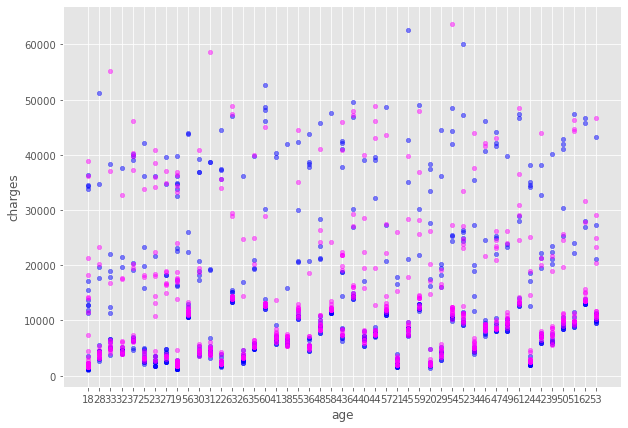

In [32]:
# scatter plots and regression lines

# males and females dataframes
df_males = df[df['sex'] == 'male']
df_females = df[df['sex'] == 'female']

# Scatter plots.
ax1 = df_males.plot(kind='scatter', x='age', y='charges', color='blue', alpha=0.5, figsize=(10, 7))
df_females.plot(kind='scatter', x='age', y='charges', color='magenta', alpha=0.5, figsize=(10, 7), ax=ax1)

# regression lines
plt.plot(df_males.age, male_fit[0] * df_males.age + male_fit[1], color='darkblue', linewidth=2)
plt.plot(df_females.age, female_fit[0] * df_females.age + female_fit[1], color='deeppink', linewidth=2)

# regression equations
plt.text(50, 230, 'y={:.2f}+{:.2f}*x'.format(male_fit[1], male_fit[0]), color='darkblue', size=12)
plt.text(60, 130, 'y={:.2f}+{:.2f}*x'.format(female_fit[1], female_fit[0]), color='deeppink', size=12)

# legend, title and labels.
plt.legend(labels=['Males Regresion Line', 'Females Regresion Line', 'Males', 'Females'])
plt.title('Relationship between bmi and charges', size=24)
plt.xlabel('age', size=18)
plt.ylabel('charges', size=18);

TypeError: can't multiply sequence by non-int of type 'float'

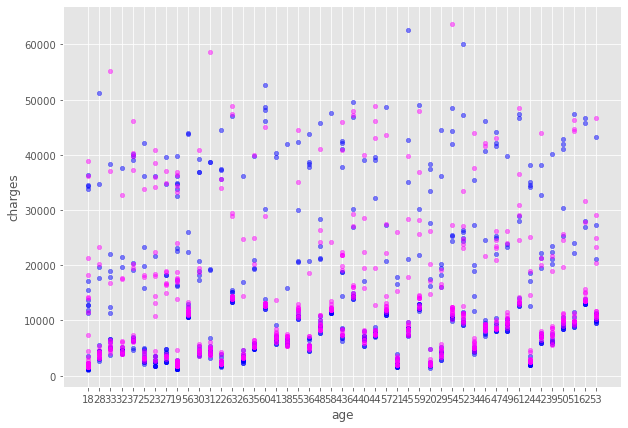

In [33]:
# scatter plots and regression lines

# males and females dataframes
df_males = df[df['sex'] == 'male']
df_females = df[df['sex'] == 'female']

# Scatter plots.
ax1 = df_males.plot(kind='scatter', x='age', y='charges', color='blue', alpha=0.5, figsize=(10, 7))
df_females.plot(kind='scatter', x='age', y='charges', color='magenta', alpha=0.5, figsize=(10, 7), ax=ax1)

# regression lines
plt.plot(df_males.age, male_fit[0] * df_males.age + male_fit[1], color='darkblue', linewidth=2)
plt.plot(df_females.age, female_fit[0] * df_females.age + female_fit[1], color='deeppink', linewidth=2)

# regression equations
plt.text(50, 230, 'y={:.2f}+{:.2f}*x'.format(male_fit[1], male_fit[0]), color='darkblue', size=12)
plt.text(60, 130, 'y={:.2f}+{:.2f}*x'.format(female_fit[1], female_fit[0]), color='deeppink', size=12)

# legend, title and labels.
plt.legend(labels=['Males Regresion Line', 'Females Regresion Line', 'Males', 'Females'])
plt.title('Relationship between age and charges', size=24)
plt.xlabel('age', size=18)
plt.ylabel('charges', size=18);

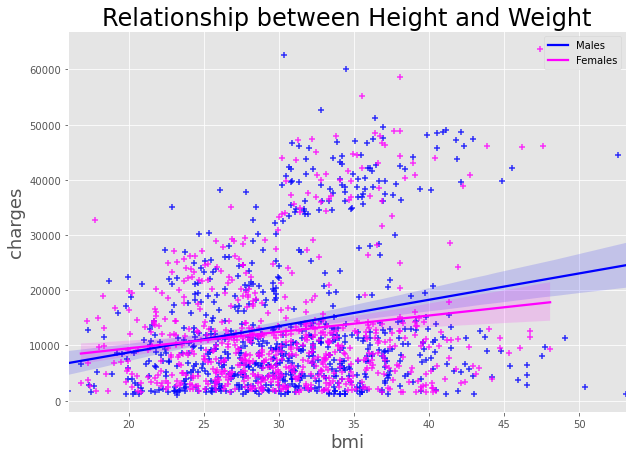

In [34]:
import seaborn as sns

# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=df_males.bmi, y=df_males.charges, color='blue', marker='+')
sns.regplot(x=df_females.bmi, y=df_females.charges, color='magenta', marker='+')

# Legend, title and labels.
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('bmi', size=18)
plt.ylabel('charges', size=18);

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

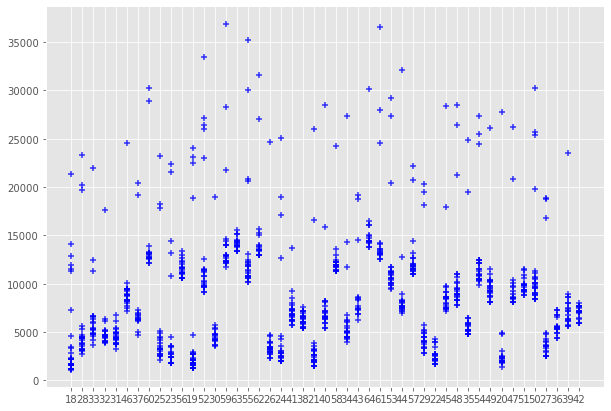

In [28]:
# 300 random samples
df_smokeryes_sample = df[df['smoker'] == 'yes'] #.sample(200)
df_smokerno_sample = df[df['smoker'] == 'no'] #.sample(200)

# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=df_smokerno_sample.age, y=df_smokerno_sample.charges, color='blue', marker='+')
sns.regplot(x=df_smokeryes_sample.age, y=df_smokeryes_sample.charges, color='magenta', marker='+')

# legend, title, and labels.
plt.legend(labels=['Smoker_no', 'Smoker_yes'])
plt.title('Relationship between smoker and charges', size=24)
plt.xlabel('age', size=18)
plt.ylabel('charges', size=18);

In [ ]:
# 300 random samples
df['bmi'] = df['bmi'].astype('str')
df_bmi30_sample = df[df['bmi'] <= '30.00'] #.sample(200)
df_bmi31_sample = df[df['bmi'] >= '30.00'] #.sample(200)

# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=df_bmi30_sample.age, y=df_bmi30_sample.charges, color='blue', marker='+')
sns.regplot(x=df_bmi31_sample.age, y=df_bmi31_sample.charges, color='magenta', marker='+')

# legend, title, and labels.
plt.legend(labels=['bmi<=30', 'bmi>=30'])
plt.title('Relationship between bmi, age and charges', size=24)
plt.xlabel('age', size=18)
plt.ylabel('charges', size=18);

In [ ]:
# 300 random samples
ds = df.replace(['yes'],'1')
ds = df.replace(['no'],'0')

ds['bmi'] = ds['bmi'].astype('str')
ds['smoker'] = ds['smoker'].astype('str')
ds_bmi30_sample = ds[ds['bmi'] <= '30.00'].sample(200)
ds_bmi31_sample = ds[ds['bmi'] >= '30.00'].sample(200)

# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=ds_bmi30_sample.smoker, y=ds_bmi30_sample.age, color='blue', marker='+')
sns.regplot(x=ds_bmi31_sample.smoker, y=ds_bmi31_sample.age, color='magenta', marker='+')

# legend, title, and labels.
plt.legend(labels=['bmi<=30', 'bmi>=30'])
plt.title('Relationship between smoker and charges', size=24)
plt.xlabel('age', size=18)
plt.ylabel('charges', size=18);

In [ ]:
import seaborn as sns

# dataframe containing only females
df_smoker = df[df['smoker'] == 'yes']#.sample(200)

# residual plot 500 females
fig = plt.figure(figsize = (10, 7))
sns.residplot(df_smoker.bmi, df_smoker.charges, color='magenta')

# title and labels
plt.title('Residual plot 200 smoker', size=24)
plt.xlabel('bmi', size=18)
plt.ylabel('charges', size=18);

In [ ]:
# dataframe containing only males
df_males = df[df['smoker'] == 'no']#.sample(200)

# residual plot 200 males
fig = plt.figure(figsize=(10, 7))
sns.residplot(df_males.age,df_males.charges, color='blue')

# title and kabel
plt.title('Residual plot 500 males', size=24)
plt.xlabel('bmi', size=18)
plt.ylabel('charges', size=18);

In [ ]:
from sklearn.linear_model import LinearRegression

df_males = df[df['sex'] == 'male']

# create linear regression object
lr_males = LinearRegression()

# fit linear regression
lr_males.fit(df_males[['bmi']], df_males['charges'])

# get the slope and intercept of the line best fit
print(lr_males.intercept_)
# -805.5451651920794

print(lr_males.coef_)
# [477.07833577]


df_females = df[df['sex'] == 'female']

# create linear regression object
lr_females = LinearRegression()

# fit linear regression
lr_females.fit(df_females[['bmi']], df_females['charges'])

# get the slope and intercept of the line best fit
print(lr_females.intercept_)
# 3543.8124859186537

print(lr_females.coef_)
# [297.1176793]

In [ ]:
df_females = df[df['sex'] == 'female']

# fit the model using numpy
female_fit = np.polyfit(df_females.bmi, df_females.charges, 1)

# predictions using numpy
print(np.polyval(female_fit, [60]))
# [21370.87324386]

# fit the model using scikit learn
lr_females = LinearRegression()
lr_females.fit(df_females[['bmi']], df_females['charges'])

# predictions using scikit learn
print(lr_females.predict([[60]]))
# [21370.87324386]

In [ ]:
df_dummy = df.copy()

#df_dummy = df_dummy.replace(['yes'],'1')
#df_dummy = df_dummy.replace(['no'],'0')
#df_dummy = df_dummy.replace(['male'],'1')
#df_dummy = df_dummy.replace(['female'],'0')

df_dummy.head()

In [ ]:
# drop female column
#df_dummy.drop('Gender_Female', axis=1, inplace=True)

# rename Gender_Male column
#df_dummy.rename(columns={'Gender_Male': 'sex'}, inplace=True)

#df_dummy = pd.get_dummies(df_dummy, columns =['sex'])

#df_dummy.rename({'sex_0':'female', 'sex_1':'male'}, axis='columns')

# df_dummy dataframe first 5 columns


# create dummies for pitching team, batting team, pitcher id, batter id

# bring the dummies back into the original dataset

#print(df_dummy)

#dummy = df_dummy.join(pd.get_dummies(df_dummy.astype(str), prefix='', prefix_sep='male'))
#print (df)


#dummy = pd.get_dummies(df_dummy['sex']).rename(columns=lambda x: 'sex_' + str(x))
#dummy = pd.concat([dummy], axis=1)
 
##dummy_sex = pd.get_dummies(df_dummy.sex, prefix='sex_')
##dummy_bmi = pd.get_dummies(df_dummy.bmi, prefix='bmi_')
##dummy_sex.head(10)



s = pd.get_dummies(df_dummy, columns=['smoker','bmi','age'])
#s = pd.get_dummies(df_dummy, columns=['bmi'])
#s = pd.get_dummies(df_dummy, columns=['smoker'])


# drop female column
#df_dummy.drop('Gender_Female', axis=1, inplace=True)

# rename Gender_Male column
#df_dummy.rename(columns={'Gender_Male': 'Gender'}, inplace=True)

# df_dummy dataframe first 5 columns
s.head()

In [ ]:

# drop female column
#s.drop('sex_female', axis=1, inplace=True)

# rename Gender_Male column
#s.rename(columns={'sex_male': 'Gender'}, inplace=True)

# df_dummy dataframe first 5 columns
#s.head()

In [ ]:
from sklearn.linear_model import LinearRegression

# create linear regression object
mlr = LinearRegression()

# fit linear regression
mlr.fit(s[['bmi_33.77', 'smoker_yes' ,'age_20']], s['charges'])

# get the slope and intercept of the line best fit.
print(mlr.intercept_)
# 13945.109918282455

print(mlr.coef_)
# [  655.79094842 -1388.40914443]

# charges = 13945.109918282455 + 655.79094842*age - 1388.40914443*gender // female = 1 , male = 0 
# x = 8434.268297856204 + 23564.44969057*smoker + 14114.79301158* bmi 

In [ ]:
df.head(3)

In [ ]:
x = 8555.153780935185 *(23603.28146965*smoker -65.37843464*bmi -5745.60155171*age)
print(x)

In [ ]:
f = 8446.950361882296 *( (23603.28146965*0) -(6855.06148094*33.77) -(5745.60155171*18))
print(f)